In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# *K-Means Clustering algorithm*

**create a K-means clustering MODEL to group customers of a retail store based on their purchase history**

**Import Neccessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler     #preprocessing
from sklearn.cluster import KMeans                   #ML MODEL Unsupervised learning
from sklearn.metrics import silhouette_score          #evaluation of model

**Load Dataset**

In [5]:
df=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Data Analysis                       
  Data Visualisation                  
  Exploratory Data Analysis**

Text(0, 0.5, 'Annual income in k$ of customers')

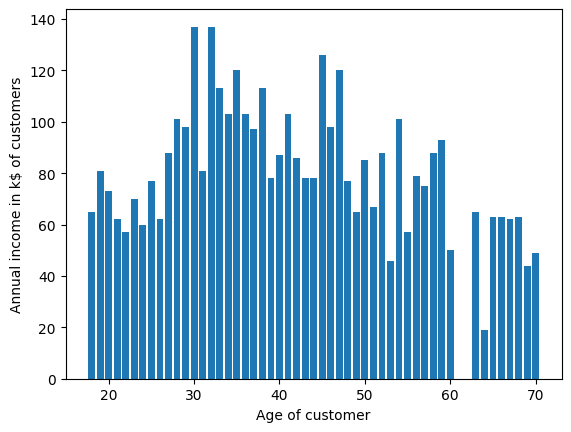

In [10]:
#Distribution of annual income among different age groups
plt.bar(df['Age'],df['Annual Income (k$)'])
plt.xlabel('Age of customer')
plt.ylabel('Annual income in k$ of customers')
#the customers with age 29-33 have high income

In [15]:
#the customer(s) with high spendingscore i.e who spends more on the mall
df[df['Spending Score (1-100)'] == df['Spending Score (1-100)'].max()]  #selecting data

#the customer12 is highed spending one

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99


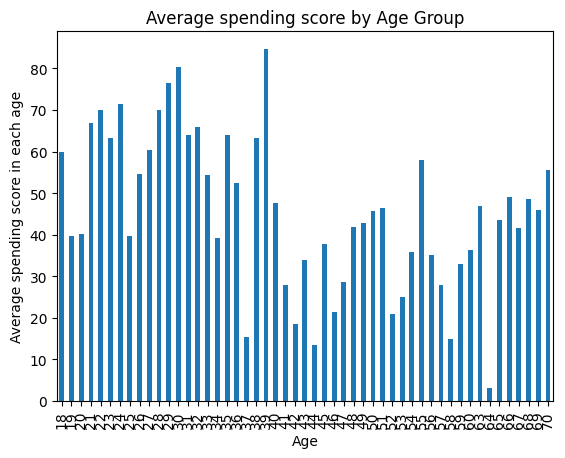

In [18]:
#average spending by age group
df.groupby('Age')['Spending Score (1-100)'].mean().plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Average spending score in each age")
plt.title("Average spending score by Age Group")
plt.show()

Text(0.5, 1.0, 'Average Annual Income by Gender group')

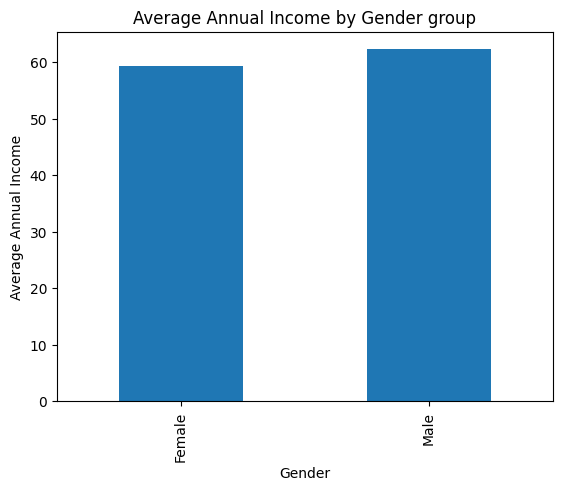

In [26]:
#Average annual income and average spending score by gender
df.groupby('Gender')['Annual Income (k$)'].mean().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Average Annual Income")
plt.title("Average Annual Income by Gender group")


Text(0.5, 1.0, 'Average Spending Score (1-100) by Gender group')

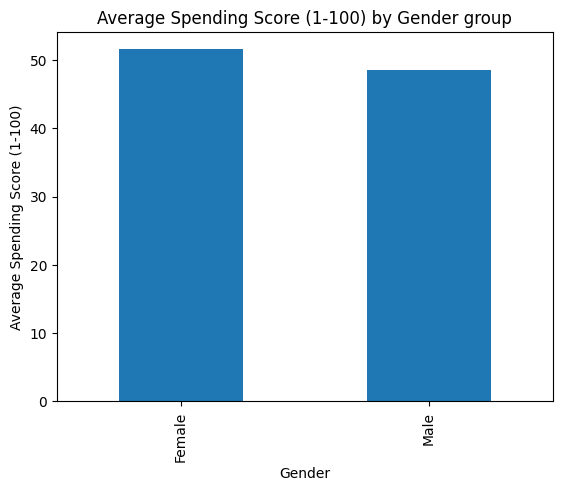

In [28]:
df.groupby('Gender')['Spending Score (1-100)'].mean().plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Average Spending Score (1-100)")
plt.title("Average Spending Score (1-100) by Gender group")

**PreProcessing**

<Axes: >

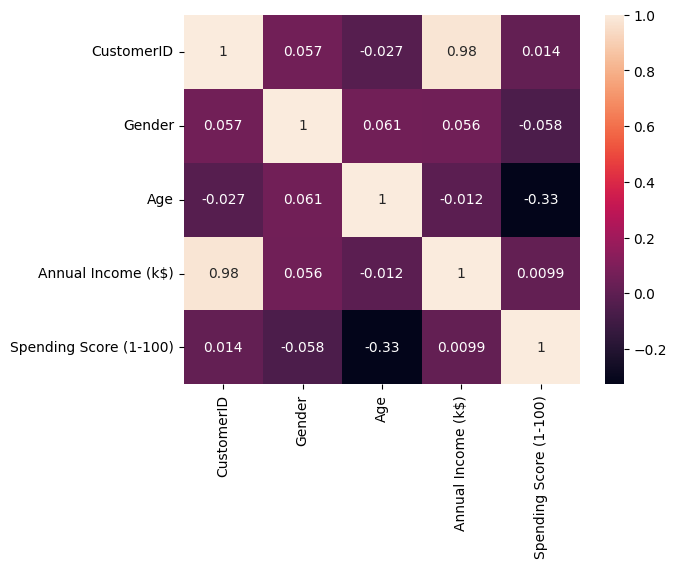

In [35]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True) #standardising
sns.heatmap(df.select_dtypes(include=['int64']).corr(),annot=True) #relationship

In [38]:
print(df.isnull().sum())    #handling missing values
print(df.info())            #information
df.drop(['CustomerID'],axis=1,inplace=True)


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB
None


**Model Building**

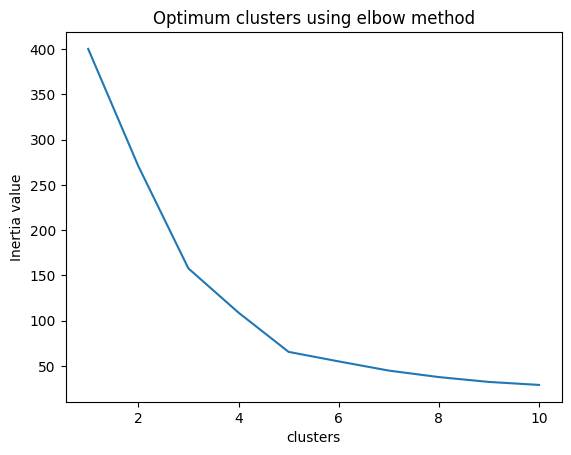

In [45]:

#select the features
data=df[['Annual Income (k$)','Spending Score (1-100)']]

#standardising
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)

#selecting the optimum cluster number (K) using elbow method
inertia=[]    # for storing interia values and find the best interia in it to find k
for i in range(1,11):                                     #run for 10 rounds i.e noting upto 10 clusters numbers
    kmeans=KMeans(n_clusters=i,random_state=42,n_init=10) # i will be cluster number& any change everytime after noted the inertia
    kmeans.fit(data_scaled)                              #using our data
    inertia.append(kmeans.inertia_)                      #interia_ is a metric to find the optimistic cluster value(based on this)

#elbow method
plt.plot(range(1,11),inertia)
plt.xlabel('clusters')
plt.ylabel('Inertia value')
plt.title('Optimum clusters using elbow method')
plt.show()



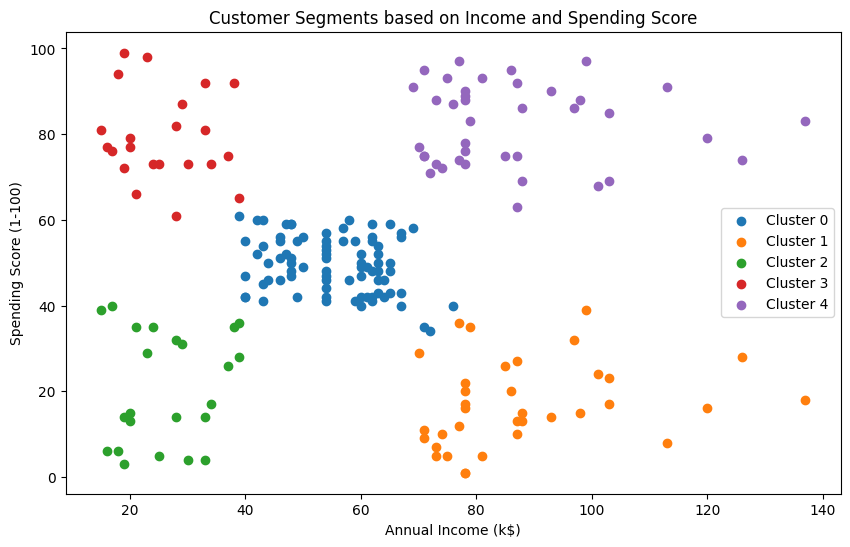

In [49]:
# Based on the Elbow plot, choose the optimal number of clusters (let's say K=5 for example)
optimal_k = 5 # You should determine this from the plot

# 4. Apply K-Means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10) # Added n_init
df['cluster'] = kmeans.fit_predict(data_scaled)

# 5. Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_num in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_num]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster_num}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments based on Income and Spending Score')
plt.legend()
plt.show()


**MODEL EVALUATION**

In [54]:

# Assuming X_scaled is your scaled data and df['cluster'] contains the cluster assignments
silhouette_avg = silhouette_score(data_scaled, df['cluster'])

print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.5546571631111091


**Prediction new data**

In [55]:

# Assuming you have a new data point (e.g., a new customer's income and spending score)
new_data = [[60, 55]] # Example new data point: [Annual Income, Spending Score]

# Scale the new data using the same scaler fitted on the training data
new_data_scaled = scaler.transform(new_data)

# Predict the cluster for the new data point
predicted_cluster = kmeans.predict(new_data_scaled)

print(f"The new data point belongs to cluster: {predicted_cluster[0]}")

The new data point belongs to cluster: 0
